<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


1.

In [3]:
df.columns

Index(['year', 'desplazamiento', 'cilindros', 'co2', 'clase_tipo',
       'traccion_tipo', 'transmision_tipo', 'combustible_tipo',
       'tamano_motor_tipo', 'consumo_tipo', 'co2_tipo',
       'consumo_litros_milla'],
      dtype='object')

In [4]:
#dejar datos numericos
df_num = df[['desplazamiento','cilindros','co2','consumo_litros_milla']]

In [5]:
# resumen de la informacion

def resumen_por_columna(df_num,cols):
    pd_series = df_num[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

In [6]:
frames = []

for col in df_num.columns:
    aux_df = resumen_por_columna(df_num,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,desplazamiento,66,2
1,cilindros,10,3
2,co2,596,0
3,consumo_litros_milla,49,0


In [7]:
print('Vemos que tenemos que corregir las columnas desplazamiento y cilindros.')

Vemos que tenemos que corregir las columnas desplazamiento y cilindros.


In [8]:
##calculamos los promedios
columnas_vacio=['desplazamiento', 'cilindros']
promedio_desplazamiento=0
promedio_cilindros=0
df_sin_vacios=df_num.dropna().reset_index()
for i in range(len(df_sin_vacios)):
    promedio_desplazamiento = promedio_desplazamiento + df_sin_vacios.loc[i,'desplazamiento']
    promedio_cilindros = promedio_cilindros + df_sin_vacios.loc[i,'cilindros']
promedio_desplazamiento=promedio_desplazamiento / len(df_sin_vacios) 
promedio_cilindros=promedio_cilindros / len(df_sin_vacios)

In [9]:
promedio_cilindros

5.746493421767968

In [10]:
#Asignamos a los valores nulos el promedio de las columnas
df_num.loc[df_num['desplazamiento'].isnull(),'desplazamiento'] = promedio_desplazamiento
df_num.loc[df_num['cilindros'].isnull(),'cilindros'] = promedio_cilindros

C:\Users\pipek\Miniconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-10-25bb7d84f28c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num['desplazamiento'].isnull(),'desplazamiento'] = promedio_desplazamiento
<ipython-input-10-25bb7d84f28c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num.loc[df_num['cilindr

In [11]:
#comprobamos que no haya valores Nan
frames=[]
for col in df_num.columns:
    aux_df = resumen_por_columna(df_num,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,desplazamiento,66,0
1,cilindros,10,0
2,co2,596,0
3,consumo_litros_milla,49,0


In [12]:
print('Tenemos el dataset sin valores nulos.')

Tenemos el dataset sin valores nulos.


In [17]:
#Normalizamos
scaler = MinMaxScaler()
scaler.fit(df_num)
df_norm= scaler.transform(df_num)
df_norm= pd.DataFrame(data=df_norm, columns=['desplazamiento','cilindros','co2','consumo_litros_milla'])

In [18]:
df_norm

,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.243590,0.142857,0.398014,0.331027
1,0.461538,0.285714,0.527672,0.475113
2,0.243590,0.142857,0.424351,0.360294
3,0.461538,0.285714,0.527672,0.475113
4,0.410256,0.285714,0.424351,0.360294
...,...,...,...,...
36786,0.051282,0.071429,0.173307,0.083878
36787,0.038462,0.071429,0.174919,0.090196
36788,0.038462,0.071429,0.182174,0.096886
36789,0.038462,0.071429,0.176532,0.090196


2:

In [19]:
#definimos variables categoricas
df_cate=df[['year','clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo']]

In [20]:
df_cate

,year,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,1984,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,1984,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,1985,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,1985,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,1987,Coches Medianos,dos,Automatica,Premium,grande,alto,alto
...,...,...,...,...,...,...,...,...
36786,2015,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36787,2016,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo
36788,2016,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo
36789,2017,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo


In [21]:
#Pasamos de categorica a numerica
df_cate_to_num=pd.get_dummies(df_cate)

3.

In [24]:
#concatenamos nuestras variables categoricas y numericas nuevamente
df_procesado=pd.concat([df_cate_to_num, df_num], axis=1)

In [25]:
df_procesado

,year,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,...,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,2.5,4.0,522.764706,0.222671
1,1984,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,4.2,6.0,683.615385,0.291185
2,1985,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,2.5,4.0,555.437500,0.236588
3,1985,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,4.2,6.0,683.615385,0.291185
4,1987,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2015,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,1.0,3.0,244.000000,0.105150
36787,2016,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0.9,3.0,246.000000,0.108155
36788,2016,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0.9,3.0,255.000000,0.111336
36789,2017,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0.9,3.0,248.000000,0.108155


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

1.

In [26]:
#Ajuste del modelo
kmeans = KMeans(n_clusters=8, random_state=0).fit(df_procesado)

2.

In [36]:
#calcular clusters
clusters = kmeans.labels_
clusters

array([1, 5, 1, ..., 4, 4, 4])

In [37]:
#calcular centroides
centroids = kmeans.cluster_centers_
centroids

array([[ 2.00208321e+03,  2.23790928e-02,  1.22108741e-01,
         2.11775308e-02,  1.25112646e-01,  5.68338840e-01,
         1.16701712e-01,  2.10273355e-03,  2.20787023e-02,
         1.45238810e-01,  8.54761190e-01,  5.55121658e-01,
         4.44878342e-01, -2.73218947e-17,  7.48573145e-01,
         4.29558426e-02,  2.08471012e-01,  1.02132773e-02,
         7.94532893e-02, -3.99680289e-15,  5.81405828e-01,
         3.28627215e-01, -2.91433544e-15,  2.80714929e-01,
         3.00390508e-04, -2.74780199e-15,  7.18984680e-01,
        -7.21644966e-16,  3.11655152e-01,  2.66453526e-15,
        -2.22044605e-15,  6.88344848e-01,  2.13513723e+00,
         4.20088510e+00,  3.63077688e+02,  1.54313629e-01],
       [ 1.99951826e+03,  3.29435542e-01,  1.45806265e-02,
         3.99884510e-02,  4.28757038e-02,  1.34690342e-01,
         2.20874838e-01,  1.12747221e-01,  1.04807276e-01,
         4.04504114e-01,  5.95495886e-01,  7.31774217e-01,
         2.68225783e-01, -3.25260652e-17,  6.76916414e-

3.

In [38]:
# promedios de variables numericas por categoria
df["cluster"] = clusters
df["cluster"] = df["cluster"].astype('category')

In [40]:
#Promedios de las variables por categoria
df.groupby(['cluster']).mean()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,2002.088125,2.134720,4.200330,363.060539,0.154310
1,1999.530795,4.308625,6.808597,557.619569,0.236449
2,1995.201724,5.566983,8.520690,765.470899,0.326388
3,2000.155304,3.483013,6.080492,481.546703,0.204756
4,2006.017186,1.746652,3.970999,285.912290,0.122388
5,1998.401634,5.159897,8.033293,652.739832,0.276968
6,1990.807107,6.039086,9.035533,949.368042,0.404383
7,2001.506745,2.757915,5.067220,425.448465,0.181014


In [44]:
#información de las variables por categoria
df.groupby(['cluster']).describe()

year                                                          \
          count         mean        std     min     25%     50%     75%   
cluster                                                                   
0        6661.0  2002.088125  11.239685  1984.0  1991.0  2004.0  2013.0   
1        6933.0  1999.530795   9.471361  1984.0  1991.0  2001.0  2007.0   
2        1160.0  1995.201724   9.085767  1984.0  1988.0  1993.0  2003.0   
3        7070.0  2000.155304  10.167403  1984.0  1991.0  2000.0  2009.0   
4        2793.0  2006.017186  11.040353  1984.0  1996.0  2011.0  2015.0   
5        3304.0  1998.401634   9.280570  1984.0  1990.0  1998.0  2006.0   
6         197.0  1990.807107   7.291549  1984.0  1985.0  1989.0  1992.0   
7        8673.0  2001.506745   9.926098  1984.0  1993.0  2003.0  2010.0   

                desplazamiento            ...         co2               \
            max          count      mean  ...         75%          max   
cluster                                   ...                            
0        2018.0         6659.0  2.134720  ...  386.391304   394.000000   
1        2018.0         6933.0  4.308625  ...  592.466667   605.000000   
2        2018.0         1160.0  5.566983  ...  807.909091   847.000000   
3        2018.0         7070.0  3.483013  ...  493.722222   519.000000   
4        2018.0         2793.0  1.746652  ...  313.000000   325.000000   
5        2018.0         3304.0  5.159897  ...  683.615385   709.000000   
6        2012.0          197.0  6.039086  ...  987.444444  1269.571429   
7        2018.0         8673.0  2.757915  ...  444.350000   453.000000   

        consumo_litros_milla                                          \
                       count      mean       std       min       25%   
cluster                                                                
0                     6661.0  0.154310  0.008669  0.122110  0.145593   
1                     6933.0  0.236449  0.013357  0.199232  0.222671   
2                     1160.0  0.326388  0.015553  0.270386  0.315451   
3                     7070.0  0.204756  0.007018  0.157725  0.199232   
4                     2793.0  0.122388  0.014526  0.065266  0.114709   
5                     3304.0  0.276968  0.012694  0.236588  0.270386   
6                      197.0  0.404383  0.040050  0.378541  0.378541   
7                     8673.0  0.181014  0.007419  0.151416  0.172064   

                                       
              50%       75%       max  
cluster                                
0        0.157725  0.164583  0.210301  
1        0.236588  0.252361  0.315451  
2        0.315451  0.344128  0.420601  
3        0.210301  0.210301  0.291185  
4        0.126180  0.135193  0.189270  
5        0.270386  0.291185  0.378541  
6        0.378541  0.420601  0.540773  
7        0.180258  0.189270  0.236588  

[8 rows x 40 columns]

## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [46]:
Nc=[5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,4.929176e+07
1,10,1.710717e+07
2,20,5.624911e+06
3,30,3.130674e+06
4,50,1.335839e+06


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

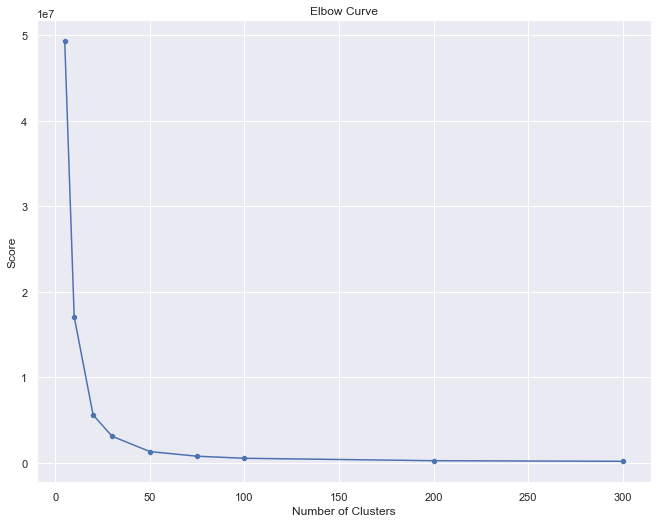

In [47]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

De esto se puede concluir que los 8 cluster que conideramos no es bueno, puesto que 10 cluster sigue no ajustandose de la mejor manera. Entre 25 y 30 cluster sería una buena elección.